# Modélisation mathématique – TP Noté

**FI-3 - 19/11/2025**

# Exercice 1: Utilisation de la librairie `scikit-learn`

1. **Chargement des données:** loadez le dataset `data.csv`.
  
2. **Anaylse de données:** Faites une petite analyse de données de ce dataset.

   - Si vous le désirez (pas obligatoire), vou pouvez encoder les variables discrètes grâce à la fonction `pd.get_dummies(df,...)`.
     <br><br>

4. **Problème de régression:** Prédisez la variable `area` en fonction des autres (toutes ou partie).

   - Puisque la variable `area` est fortement asymétrique, prédizez plutôt la transformation suivante:`log(1 + area)`. Le code pour créer cette variable transformée comme nouvelle colonne d'un dataframe `df` est:
     
     ```python
     df["log_area"] = np.log1p(df["area"])
     ```
     <br>

5. **Problème de classification:** Prédisez maintenant une variable appelée `severity`, obtenue en discrétisant de variable `area` en 3 classes: `faible`, `moyen` et `fort`.

    - La variable `severity` s'obtient grâce au code suivant:<br><br>
   
   ```python
    def severity(area):
        if area == 0:
            return "faible"
        elif area <= 1:
            return "moyen"
        else:
            return "fort"
    ```


   <br>
   puis, pour en faire une colonne de votre dataframe `df`
   
   ```python

   df["severity"] = df["area"].apply(severity)
   ```
   
   <br>
   
   ***Remarque:** Ne vous inquiétez pas si les résultats ne sont pas très bons...*

## Librairies

In [94]:
import pandas as pd
import numpy as np

import seaborn as sns              # à commenter si marche pas...
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.metrics import (
    mean_squared_error, r2_score,  # scores pour régression
    classification_report          # score pour classification
)

from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier
# Vous pouvez importer d'autres modèles, sentez-vous libre !!!
# Toute autre import de sklearn ou autres est autorisé...

In [95]:
#1 = Chargement des données et séparation
df = pd.read_csv("data.csv")
np.shape(df)
X = df.drop(["area", "month", "day"], axis=1)
Y = df.area

X_train, X_test, y_train, y_test = train_test_split(X, Y, train_size=0.8, random_state=42)
#np.shape(X_train), np.shape(y_train), np.shape(X_test), np.shape(y_test)

X

,X,Y,FFMC,DMC,DC,ISI,temp,RH,wind,rain
0,7,5,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0
1,7,4,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0
2,7,4,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0
3,8,6,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2
4,8,6,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0
...,...,...,...,...,...,...,...,...,...,...
512,4,3,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0
513,2,4,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0
514,7,4,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0
515,1,4,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0


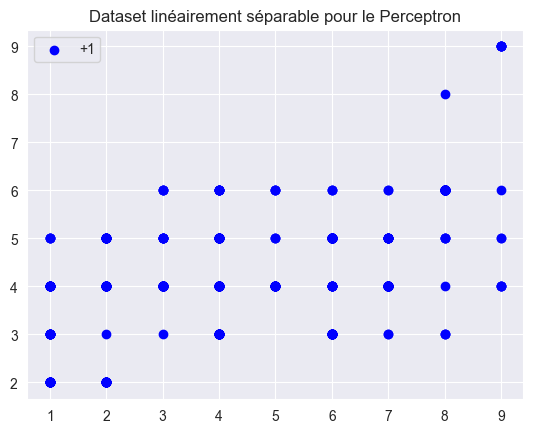

In [96]:
#2 = Analyse de données je ne sais vraiment pas quoi faire
plt.scatter(df.X, df.Y, color="blue", label="+1")
#plt.scatter(X_neg[:,0], X_neg[:,1], color="red", label="-1")
plt.legend()
plt.title("Dataset linéairement séparable pour le Perceptron")
plt.show()

In [97]:
#3 = Prédiction variable area avec linear regression
print("Régression linéaire")
doom = LinearRegression()
doom.fit(X_train, y_train)
y_pred = doom.predict(X_test)
print("MSE = "+str(mean_squared_error(y_test, y_pred)))
print("R2 score = "+str(r2_score(y_test, y_pred)))
print("\nKNN")
for x in range(1, 21) :
    knn = KNeighborsRegressor(n_neighbors=x)
    knn.fit(X_train, y_train)
    y_predk = knn.predict(X_test)
    print("X = "+str(x)+" R2 score = "+str(r2_score(y_test, y_predk)))
#alternative

Régression linéaire
MSE = 11759.94260952891
R2 score = 0.0023600333037148147

KNN
X = 1 R2 score = -0.6257761005327271
X = 2 R2 score = -0.0511510945541942
X = 3 R2 score = 0.0033709904314307426
X = 4 R2 score = -0.019452199985446672
X = 5 R2 score = -0.008336540562395856
X = 6 R2 score = -0.007248595182579143
X = 7 R2 score = -0.007938868625994688
X = 8 R2 score = -0.009103765969605382
X = 9 R2 score = -0.01626050008559332
X = 10 R2 score = -0.02310827114110814
X = 11 R2 score = 0.009894448062857886
X = 12 R2 score = 0.00914884514257952
X = 13 R2 score = 0.009169155022898723
X = 14 R2 score = 0.008066618719761554
X = 15 R2 score = 0.006858007594496729
X = 16 R2 score = 0.004802831596158463
X = 17 R2 score = 0.003714558137945412
X = 18 R2 score = 0.0039881328864546095
X = 19 R2 score = 0.003295387860959176
X = 20 R2 score = 0.004934627686933757


In [113]:
#4 = classification avec severity
def severity(area):
        if area == 0:
            return "faible"
        elif area <= 1:
            return "moyen"
        else:
            return "fort"
df["severity"] = df["area"].apply(severity)

X = df.drop(["area", "month", "day", "severity"], axis=1)
Y = df.severity
X_train, X_test, y_train, y_test = train_test_split(X, Y, train_size=0.8, random_state=42)

knn = KNeighborsClassifier(7)
knn.fit(X_test, y_test)
y_pred = knn.predict(X_test)

print(classification_report(y_test, y_pred, zero_division=0.0))


              precision    recall  f1-score   support

      faible       0.66      0.76      0.71        51
        fort       0.67      0.62      0.65        48
       moyen       0.00      0.00      0.00         5

    accuracy                           0.66       104
   macro avg       0.44      0.46      0.45       104
weighted avg       0.63      0.66      0.65       104



# Exercice 2: Algorithme de classification binaire

> - Implémenter **l'algorithme de classification binaire** qui est décrit ci-dessous sous forme de **pseudo-code**.
> - Utlisez une implémentation sous forme de **classe**.
> - L'algorthme devra contenir les **méthodes** `fit` et `predict` pour entraîner le modèle et prédire de nouvelles data, respectivement.
> - Appliquez votre algorithme sur le **dataset** `X, y` ci-dessous.

```text
Algo (pseudo-code)
------------------

# Entrées :
    - X ∈ ℝ^{n×d}                             # features: n lignes, d colonnes
    - y ∈ {−1, +1}^n                          # labels: n valeurs +1 ou -1
    - eta : taux d’apprentissage              # ex. eta=0.1
    - max_iter : nombre maximal d’itérations  # ex. max_iter=50

# Initialisation :
    - w ← 0_d        (vecteur de poids initialisés à 0, dim. d)
    - b ← 0          (biais initialisé à 0)

# Boucle d'entraînement
    For t = 1 → max_iter :
        For i = 1 → n :
            y_pred ← signe( w · X[i] + b )   # produit scalair
            If y_pred ≠ y[i] :
                w ← w + eta * y[i] * X[i]
                b ← b + eta * y[i]
    Return w, b

# Prédiction pour y_hat la data x :
    si w · x + b ≥ 0 → y_hat = +1
    sinon → y_hat = −1
```

## Dataset

In [16]:
import numpy as np
import matplotlib.pyplot as plt

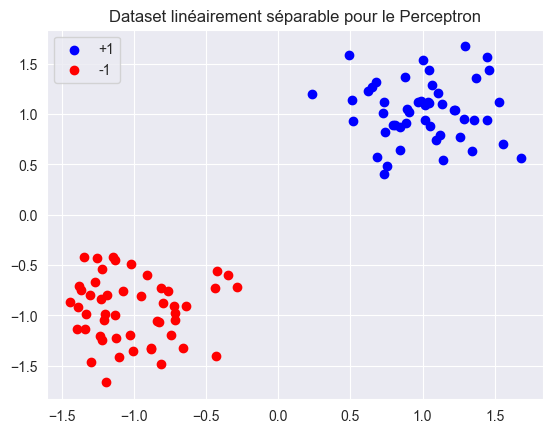

In [19]:
np.random.seed(0)

# Classe +1
X_pos = np.random.randn(50, 2) * 0.3 + np.array([1, 1])
y_pos = np.ones(50)

# Classe -1
X_neg = np.random.randn(50, 2) * 0.3 + np.array([-1, -1])
y_neg = -np.ones(50)

X = np.vstack([X_pos, X_neg])
y = np.hstack([y_pos, y_neg])

# Visualisation du dataset
plt.scatter(X_pos[:,0], X_pos[:,1], color="blue", label="+1")
plt.scatter(X_neg[:,0], X_neg[:,1], color="red", label="-1")
plt.legend()
plt.title("Dataset linéairement séparable pour le Perceptron")
plt.show()

In [ ]:
class ClassBinaireKNN() :
    def __init__(self, max_iter, eta):
        self.w = None
        self.b = 0
        self.max_iter = max_iter
        self.eta = eta

    def fit(self, x, y) :
        self.w = [0]*np.shape(x)[1]
        for i in np.unique(y) :
            pass #PAS FINI
        for t in range (1, self.max_iter) :
            for i in range(np.shape(x)[0]) :
                pass #PAS FINI


# Boucle d'entraînement
#    For t = 1 → max_iter :
#        For i = 1 → n :
#            y_pred ← signe( w · X[i] + b )   # produit scalair
#            If y_pred ≠ y[i] :
#                w ← w + eta * y[i] * X[i]
#                b ← b + eta * y[i]
#    Return w, b


In [34]:
np.random.seed(0)

# Classe +1
X_pos = np.random.randn(50, 2) * 0.3 + np.array([1, 1])
y_pos = np.ones(50)

# Classe -1
X_neg = np.random.randn(50, 2) * 0.3 + np.array([-1, -1])
y_neg = -np.ones(50)

X = np.vstack([X_pos, X_neg])
y = np.hstack([y_pos, y_neg])

for i in np.unique(y) :
    print(i)


-1.0
1.0
